In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def show_image(img, text):
    plt.axis('off')
    plt.title(text)
    plt.imshow(img)

def show_gray(image, text):
    plt.axis('off')
    plt.title(text)
    plt.imshow(image, cmap='gray')

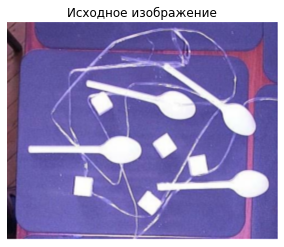

In [22]:
img = cv2.imread('task_22.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image(img, "Исходное изображение")

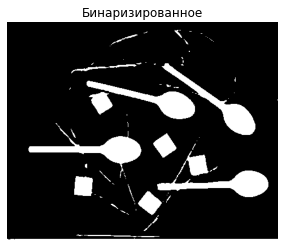

In [23]:
thresh, binarized = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
show_gray(binarized, "Бинаризированное")

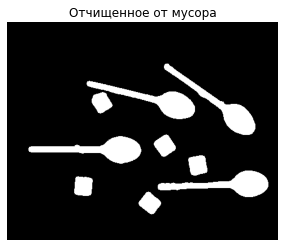

In [24]:
mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
opened = cv2.morphologyEx(binarized, cv2.MORPH_OPEN, mask)
show_gray(opened,"Отчищенное от мусора")

In [25]:
labels = []
labels_num, labels = cv2.connectedComponents(opened)
infos = []

for i in range(1, labels_num):
    current_image = np.array(labels == i, dtype=np.uint8)
    info = {'area': np.sum(current_image), 'image': current_image}
    infos.append(info)

infos.sort(key=lambda x: x['area'])
diffs = [infos[i]['area'] - infos[i - 1]['area'] for i in range(1, labels_num - 1)]
border = np.argmax(diffs) + 1

Всего объектов: 9
Кол-во сахара: 5
Кол-во ложек: 4


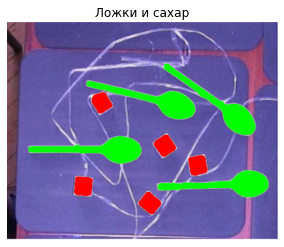

In [31]:
objects = img.copy()

for i in range(border):
    cnt, _ = cv2.findContours(infos[i]['image'], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(objects, cnt, 0, [255,0,0], -1)

for i in range(border, labels_num - 1):
    cnt, _ = cv2.findContours(infos[i]['image'], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(objects, cnt, 0, [0,255,0], -1)

show_image(countours,"Ложки и сахар")

print("Всего объектов:", len(infos))
print("Кол-во сахара:", len(infos[:border]))
print("Кол-во ложек:", len(infos[border:]))